# Business Problem Understanding
## Context
Mobil bekas adalah mobil yang sebelumnya telah dimiliki oleh orang lain dan sekarang dijual kepada orang lain. Biasanya, mobil bekas memiliki jarak tempuh yang lebih tinggi dan usia yang lebih tua dibandingkan dengan mobil baru. Namun, harga jual mobil bekas umumnya lebih rendah dibandingkan dengan harga mobil baru. Peminat atau pembeli mobil bekas harus melakukan inspeksi dan pengujian berbagai aspek teknis maupun non teknis sebelum membeli mobil bekas untuk memastikan kondisi kendaraan itu sesuai kriteria peminat atau pembeli. Mobil bekas dapat dibeli dari berbagai sumber, seperti dari pemilik langsung, dealer mobil bekas, atau lelang mobil. Membeli mobil bekas dapat menjadi pilihan yang baik untuk orang yang ingin menghemat uang dengan mempertimbangkan kondisi mobil tersebut.

Sebagai penjual mobil bekas, kita harus memiliki sebuah model bisnis yang dapat menyediakan layanan pelanggan yang baik, membangun reputasi bisnis sebagai penjual mobil bekas, dan menentukan harga jual kompetitif untuk berbagai jenis mobil. Selain itu, kita sebagai penjual mobil bekas juga harus tetap terus menganalisis dan meningkatkan kinerja bisnis, seperti menggunakan data dan analitik untuk memahami preferensi pelanggan dan menyesuaikan model bisnis yang sesuai. Jika dilihat dari sudut pandang bisnis, tujuan jangka panjang dari penjualan mobil bekas sebagai penjual adalah untuk membangun model bisnis yang berkelanjutan dan menguntungkan.
## Problem Statement
Menentukan nilai harga mobil bekas secara kompetitif bagi berbagai jenis mobil bekas yang ada di arab saudi merupakan sebuah tantangan bagi penjual maupun pembeli. Banyak hal yang dapat mempengaruhi harga mobil bekas baik secara objektif/teknis ataupun subjektif. Maka dari itu, sangatlah penting untuk **mengetahui tingkat kepentingan atau besaran pengaruh dari variabel atau informasi yang tersedia dalam memprediksi harga mobil bekas yang tepat bagi perusahaan.**
## Goals
Salah satu usulan solusi yang dapat dilakukan untuk mengatasi pernyataan masalah diatas yaitu dengan cara **membangun sebuah model machine learning yang dapat memprediksi harga mobil bekas berdasarkan informasi yang ada sesuai dengan tujuan.** Dengan kemungkinan tujuan yang dimaksud yaitu seperti memaksimalkan keuntungan bagi perusahaan, menentukan harga semurah mungkin untuk menarik pelanggan baru, dll.
## Analytic Approach
Untuk mencapai tujuan tersebut maka dapat dilakukan analisa terhadap data yang ada untuk menemukan kemungkinan ada nya korelasi atau pola-pola tertentu pada data. Setelah data dianalisa, kemudian dapat dibangun sebuah model machine learning regresi untuk dapat memprediksi target berdasarkan data yang akan di fit pada model tersebut.
## Evaluation Metrics
Model kemudian akan di evaluasi menggunakan metrik evaluasi RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error). Dari 3 evaluation metrics yang digunakan akan ditampilkan dan dibandingkan hasil besaran error dari hasil prediksi model relatif terhadap masing-masing target pada data.

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
import category_encoders as ce
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# Data Understanding
- Dataset terdiri dari 5624 baris dan 11 kolom data mobil bekas yang bersumber dari syarah.com
- Informasi lain mengenai setiap mobil bekas berdasarkan kolom nya adalah :<br>

| Nama Kolom  | Tipe Data | Deskripsi                                          |
|-------------|-----------|----------------------------------------------------|
| Type        | object    | Tipe mobil bekas                                   |
| Region      | object    | Wilayah dimana mobil bekas ditawarkan untuk dijual |
| Make        | object    | Merek mobil bekas                                  |
| Gear_Type   | object    | Jenis transmisi mobil bekas                        |
| Origin      | object    | Asal mobil bekas                                   |
| Options     | object    | Pilihan mobil bekas                                |
| Year        | int64     | Tahun dimanufaktur                                 |
| Engine_Size | float64   | Ukuran mesin mobil bekas                           |
| Mileage     | int64     | Jarak tempuh mobil bekas                           |
| Negotiable  | bool      | True jika harganya 0, berarti bisa dinegosiasikan  |
| Price       | int64     | Harga mobil bekas                                  |

In [176]:
df=pd.read_csv('data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


## EDA

<Figure size 1296x432 with 0 Axes>

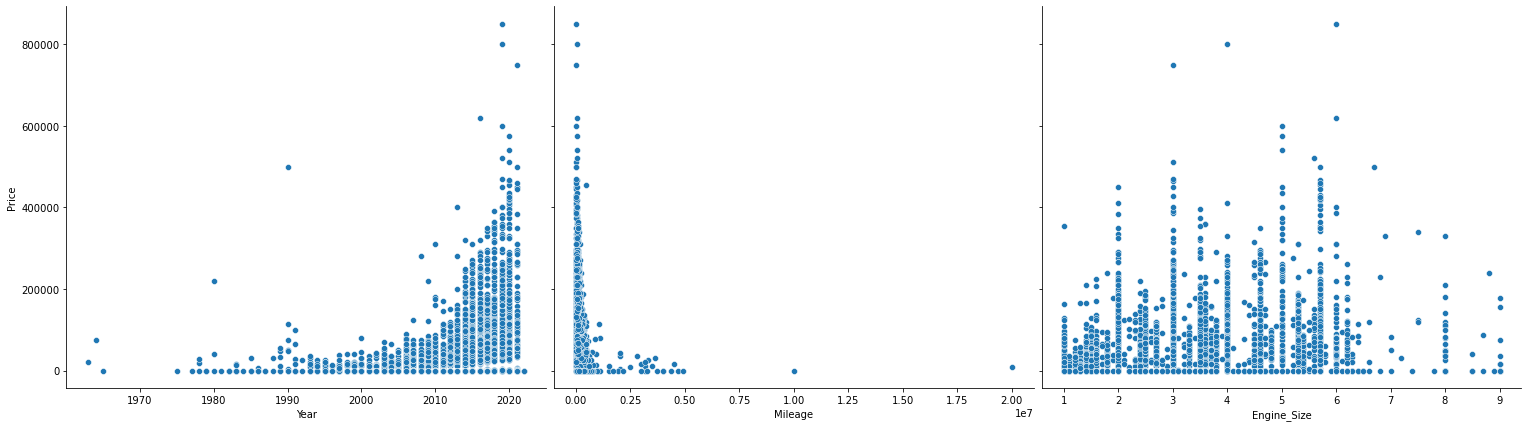

In [177]:
plt.figure(figsize=(18,6))
sns.pairplot(df, x_vars=['Year', 'Mileage', 'Engine_Size'], y_vars='Price',size=6, aspect=1.2, kind='scatter')
plt.show()

Berdasarkan tampilan diatas dapat diketahui:
- Price dengan Year memiliki hubungan berbanding lurus
- Price dengan Mileage berhubungan lemah dan berbanding terbalik
- Price dengan Engine_Size memilki hubungan yang lemah

<AxesSubplot:>

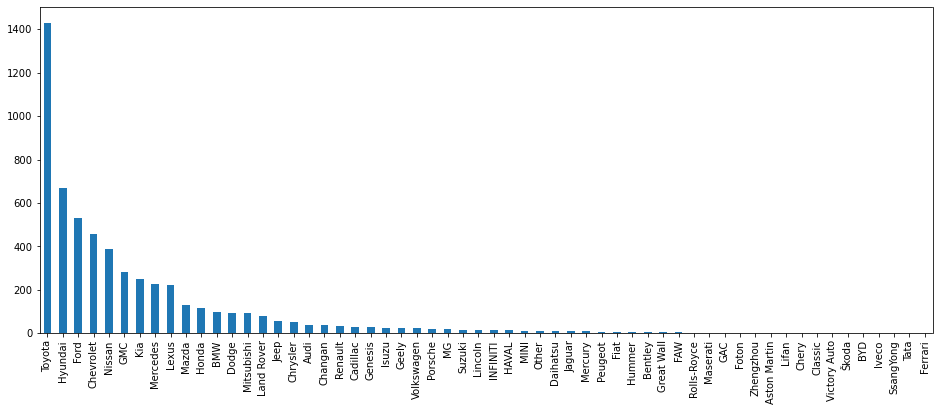

In [178]:
# Persebaran mobil bekas yang dijual berdasarkan merek mobil
plt.figure(figsize=(16,6))
df['Make'].value_counts().plot.bar()

Dari tampilan diatas dapat diketahui :
- 3 merek mobil yang paling banyak di jual yaitu Toyota, Hyundai, dan Ford
- 3 merek mobil yang paling sedikit di jual yaitu SsangYong, Tata, dan Ferrari

<AxesSubplot:>

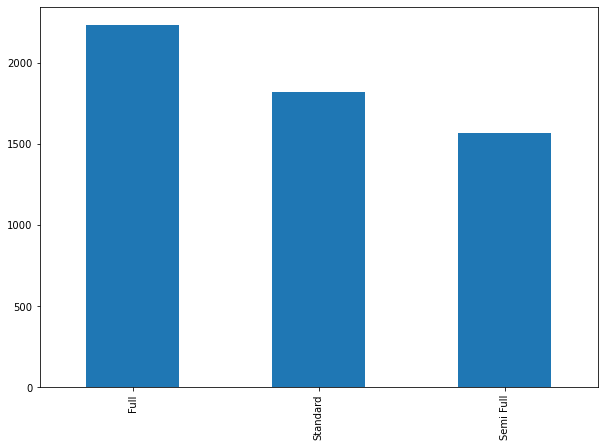

In [179]:
# Persebaran data Options
plt.figure(figsize=(10,7))
df['Options'].value_counts().plot.bar()

Dari tampilan diatas dapat diketahui bahwa mobil bekas dengan opsi 'Full' yang paling banyak dijual

<AxesSubplot:xlabel='Region'>

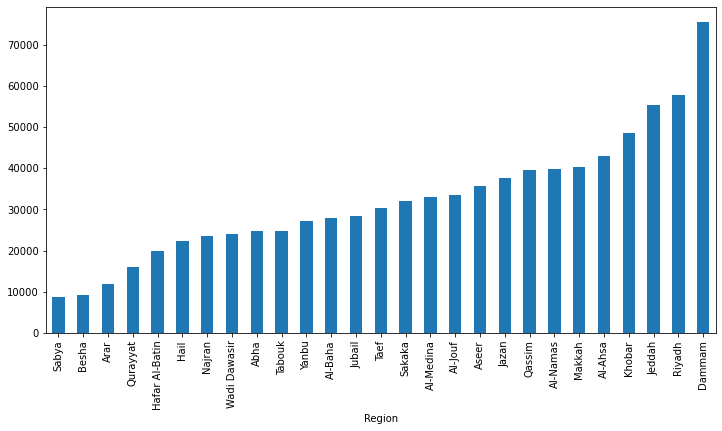

In [180]:
# Persebaran penjualan mobil bekas berdasarkan wilayah
plt.figure(figsize=(12,6))
df.groupby(['Region'])['Price'].mean().sort_values().plot.bar()

Dari tampilan diatas dapat diketahui bahwa mobil bekas paling banyak dijual di daerah Dammam dan paling sedikit di daerah Sabya

# Data Preprocessing

Berdasarkan Data Understanding yang dilakukan, kemudian data akan diproses sebagai berikut:
- Drop kolom tidak relevan yaitu kolom Type, Origin, dan Negotiable
- Drop outlier kolom tertentu
- Encode kolom Gear_Type dan Options dengan OneHotEncoder
- Encode kolom Make dan Region dengan BinaryEncoder

In [181]:
# Memeriksa karakteristik data kategorik
df.describe(include='O')

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


In [182]:
# Memeriksa karakteristik data numerik
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


Dari sini terdapat hal yang menarik yaitu nilai maksimal Mileage yang sangat tinggi yaitu sebesar 20000000

In [183]:
df[df['Mileage']==20000000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,False,9000


Jika dilihat keterangan mobil nya, sangat tidak mungkin mobil keluaran 2009 memiliki jarak tempuh hingga 20000000, maka data ini akan di drop.

In [184]:
df=df[df['Mileage']!=20000000]

In [185]:
# Memeriksa nilai null
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

Data sudah tidak memiliki nilai null

In [186]:
# Memeriksa data duplikat
df[df.duplicated()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


Masih dapat dilakukan modelling terhadap data duplikat yang ada karena data tersebut bukan merupakan duplikat secara keseluruhan

In [187]:
# Menampilkan sampel unik untuk memeriksa kemungkinan anomali
pd.set_option('display.max_colwidth', None)
lst = []
for col in df.columns :
    lst.append([col, df[col].dtypes, df[col].nunique(), df[col].unique()])

desc = pd.DataFrame(columns=['Nama Kolom', 'Tipe Data', 'Jumlah Data Unik', 'Sampel Unik'],
                     data=lst)
desc

,Nama Kolom,Tipe Data,Jumlah Data Unik,Sampel Unik
0,Type,object,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,object,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,object,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,object,2,"[Manual, Automatic]"
4,Origin,object,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,3,"[Standard, Full, Semi Full]"
6,Year,int64,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,float64,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,int64,1715,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,bool,2,"[True, False]"


In [188]:
# Drop kolom tidak relevan
dfmodel=df.copy()
dfmodel=dfmodel.drop(['Type','Origin','Negotiable'],axis=1)

### Price

<AxesSubplot:ylabel='Density'>

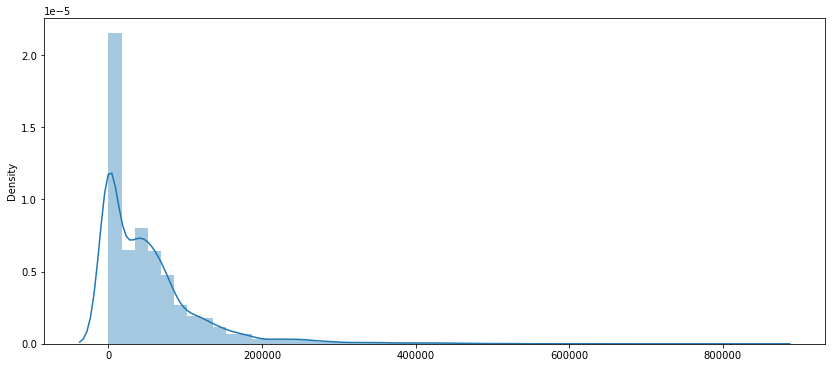

In [189]:
# Boxplot kolom Price
plt.figure(figsize=(14,6))
sns.distplot(x=dfmodel['Price'])

Persebaran data Price menunjukan pola right-skewed atau dapat disebut juga positively skewed

In [190]:
# memeriksa persebaran data pada target
dfmodel['Price'].value_counts().sort_index()

0         1797
1            1
500          1
850          1
884          1
          ... 
599000       1
620000       1
748000       1
800000       1
850000       1
Name: Price, Length: 467, dtype: int64

In [191]:
# Persentase data yang Price nya bernilai 0
len(dfmodel[dfmodel['Price']==0])/len(dfmodel)*100

31.958029521607685

Data dengan harga yang bernilai 0 akan di drop walaupun persentase nya mencapai 32% karena jika dilakukan replace dengan nilai tertentu akan sangat merubah dataset dan juga model akan dilakukan untuk memprediksi suatu harga tetap, sementara untuk harga yang masih dapat dinegosiasikan (bernilai 0) itu berarti masih sangat subjektif baik dari pihak pembeli ataupun penjual. Hal ini tentu menjadi sebuah limitasi untuk langkah modeling selanjutnya. <br><br>
Selain itu, data dengan harga bernilai dibawah dari 4000 juga akan di drop karena mobil bekas jenis apapun sangat tidak mungkin dijual dibawah 4000 riyal

In [192]:
# Drop data price yang kurang dari 4000
dfmodel=dfmodel[dfmodel['Price']>=4001]

<AxesSubplot:ylabel='Density'>

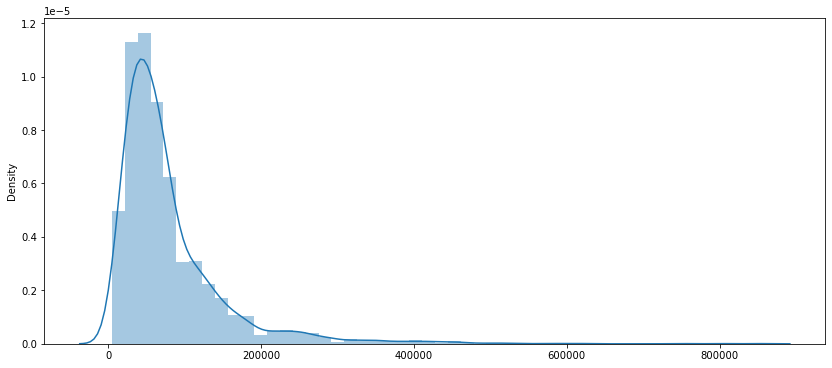

In [193]:
# Boxplot dari Price setelah di drop
plt.figure(figsize=(14,6))
sns.distplot(x=dfmodel['Price'])

Kemudian karena grafik masih menunjukan right skewed, maka akan di drop data dari batas atas

In [194]:
# Mencari nilai batas outlier
q1=dfmodel['Price'].quantile(0.25)
q3=dfmodel['Price'].quantile(0.75)
iqr=q3-q1
limit=iqr*1.5
print(f'IQR: {iqr}')

limit_bawah=q1-limit
limit_atas=q3+limit
print(f'limit_bawah: {limit_bawah}')
print(f'limit_atas: {limit_atas}') 

IQR: 59000.0
limit_bawah: -52500.0
limit_atas: 183500.0


In [195]:
dfmodel=dfmodel[dfmodel['Price']<=183500]

<AxesSubplot:ylabel='Density'>

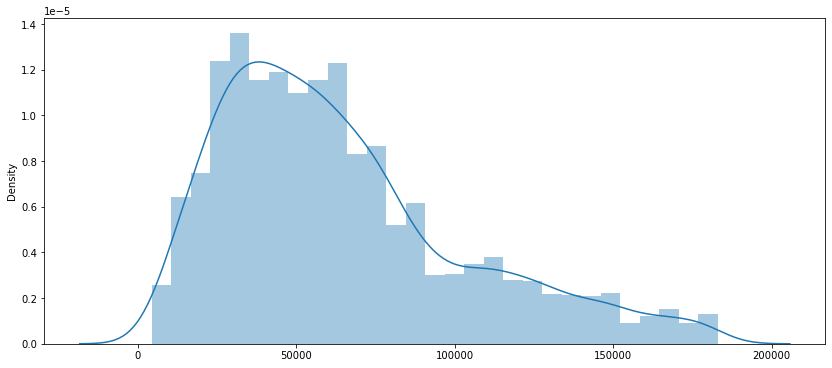

In [196]:
# Boxplot dari Price setelah di drop
plt.figure(figsize=(14,6))
sns.distplot(x=dfmodel['Price'])

### Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

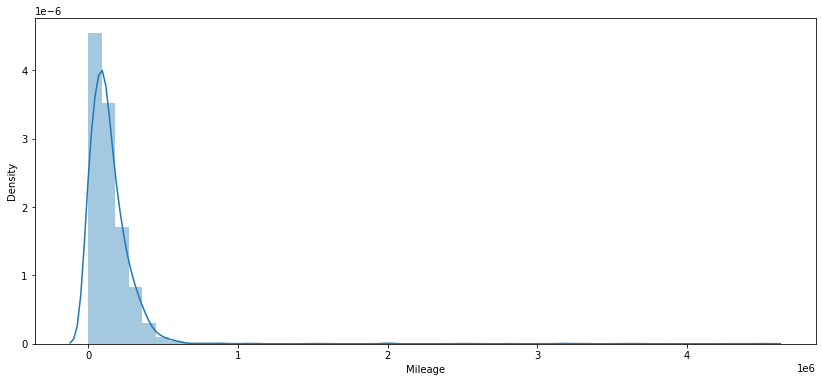

In [197]:
# Memeriksa outlier pada Mileage
plt.figure(figsize=(14,6))
sns.distplot(dfmodel['Mileage'])

Dari tampilan tersebut dapat dilihat bahwa terdapat outlier pada nilai Mileage tinggi

In [198]:
# Mencari nilai batas outlier
q1=dfmodel['Mileage'].quantile(0.25)
q3=dfmodel['Mileage'].quantile(0.75)
iqr=q3-q1
limit=iqr*1.5
print(f'IQR: {iqr}')

limit_bawah=q1-limit
limit_atas=q3+limit
print(f'limit_bawah: {limit_bawah}')
print(f'limit_atas: {limit_atas}') 

IQR: 137000.0
limit_bawah: -150500.0
limit_atas: 397500.0


In [199]:
dfmodel[dfmodel['Mileage']>=398797.5]

,Region,Make,Gear_Type,Options,Year,Engine_Size,Mileage,Price
28,Al-Ahsa,Nissan,Automatic,Semi Full,2002,3.3,550000,10000
62,Tabouk,Mercedes,Automatic,Full,1986,3.0,500000,5500
110,Riyadh,Chevrolet,Automatic,Standard,2007,1.6,2000000,5000
117,Taef,Toyota,Manual,Standard,2009,2.7,530500,33000
174,Yanbu,Dodge,Automatic,Semi Full,2013,5.7,487100,35000
...,...,...,...,...,...,...,...,...
5495,Jubail,Toyota,Manual,Full,2001,1.4,399000,10000
5520,Dammam,Toyota,Manual,Semi Full,2001,1.3,600000,10000
5554,Al-Medina,Toyota,Automatic,Full,2007,2.5,420000,25000
5595,Dammam,Toyota,Manual,Standard,2007,4.5,480000,65000


Berdasarkan nilai hitungan batas atas, data sebanyak 113 baris diatas akan di drop dari dataset

In [200]:
# Drop outlier dari berdasarkan Mileage
dfmodel=dfmodel[dfmodel['Mileage']<399797.5]

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

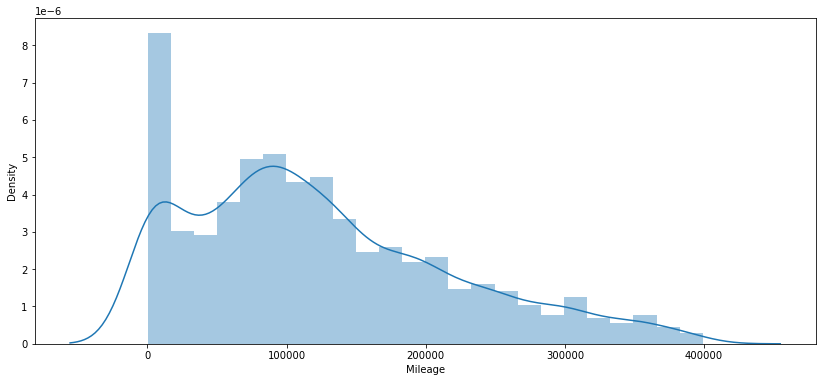

In [201]:
# Distribusi Mileage setelah drop outlier
plt.figure(figsize=(14,6))
sns.distplot(dfmodel['Mileage'])

In [202]:
# Dataset untuk di model
dfmodel

,Region,Make,Gear_Type,Options,Year,Engine_Size,Mileage,Price
1,Riyadh,GMC,Automatic,Full,2014,8.0,80000,120000
3,Hafar Al-Batin,Kia,Automatic,Semi Full,2015,2.4,220000,42000
5,Abha,Mazda,Automatic,Semi Full,2019,2.0,25000,58000
6,Riyadh,Porsche,Automatic,Full,2012,4.8,189000,85000
7,Riyadh,Hyundai,Automatic,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...
5616,Qassim,Mazda,Automatic,Full,2020,2.0,9500,132000
5618,Riyadh,GMC,Automatic,Full,2006,5.3,86000,50000
5619,Jeddah,Nissan,Automatic,Standard,2018,2.5,78794,68000
5621,Dammam,GMC,Automatic,Full,2016,5.3,48000,145000


<AxesSubplot:>

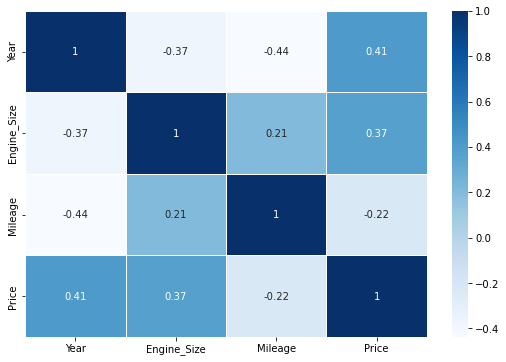

In [203]:
# Korelasi data
plt.figure(figsize=(9,6))
sns.heatmap(dfmodel.corr(method='spearman'),annot=True,linewidth=.5,cmap='Blues')

Korelasi awal menunjukan harga berbanding lurus dengan tahun manufaktur dan ukuran mesin sementara berbanding terbalik dengan jarak tempuh

# Modelling

### Encoding

In [204]:
transformer=ColumnTransformer([
    ('OneHot',OneHotEncoder(drop='first'),['Gear_Type','Options']),
    ('Binary',ce.BinaryEncoder(),['Region','Make'])
],remainder='passthrough')

### Splitting

In [205]:
# X & Y splitting
X=dfmodel.drop(['Price'],axis=1)
y=dfmodel['Price']

# Train test splitting
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

### Model Benchmarking

In [206]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-25532.02720537 -27828.39271559 -27249.53894504 -28290.80033534
 -28369.33657376] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-17938.79646238 -18980.04641859 -19327.61501254 -19318.514292
 -19062.83609361] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.33176687 -0.3148482  -0.39739039 -0.36430464 -0.34310395] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-28216.05385215 -28451.79977955 -26320.72511923 -27523.31982239
 -24934.95245408] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-19982.94454248 -19844.4822718  -19004.52803739 -19481.12248341
 -17975.63595367] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
  

In [207]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-27454.019155,1040.579598,-18925.561656,512.167372,-0.350283,0.028516
1,KNN Regressor,-27089.370205,1307.384700,-19257.742658,724.982060,-0.427209,0.026360
2,DecisionTree Regressor,-27541.187555,1721.612858,-17741.924730,1156.752358,-0.323779,0.021899
3,RandomForest Regressor,-20847.703792,792.701036,-13504.807153,356.036734,-0.242064,0.011613
4,XGBoost Regressor,-19222.538591,866.919057,-12693.787147,530.145324,-0.229162,0.012771


Model benchmarking dilakukan untuk memilih model machine learning yang mana yang akan digunakan nantinya, dengan melihat nilai evaluation metrics yang paling optimal. Nilai RMSE yang dihasilkan hampir dua kali lipat dari nilai MAE yang dihasilkan. Hal tersebut wajar karena memang dari formula perhitungannya yang berbeda. Jika dilihat dari nilai RMSE, MAE, dan MAPE, XGBoost memiliki performa yang paling bagus dibandingkan dengan jenis model yang lainnya dan di posisi kedua yaitu jenis model RandomForest

### Prediksi Test Set
Setelah diperoleh model benchmark, dapat dilakukan prediksi test set menggunakan model tersebut

In [208]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,19088.687826,13091.320587,0.251224
RandomForest,19564.314576,13459.987049,0.259520


Dari hasil prediksi yang dilakukan dapat dilihat performa model nya dengan melihat evaluation metrics nya. Jika dilihat dari evaluation metrics nya, XGBoost Regressor memang lebih unggul pada RMSE , MAE, dan MAPE dibandingkan dengan RandomForest. Karena jenis XGBoost yang lebih perform, maka akan digunakan modeling menggunakan XGBoost.

### Hyperparameter Tuning
Hyperparameter tuning dilakukan dengan tujuan meningkatkan performa model dengan cara mencari pengaturan parameter yang terbaik untuk XGBoost.

In [209]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin menurun tingkat kompleksitas modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin menurun tingkat kompleksitas modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 400,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Region',
                                                                                'Make'])])),
                          

In [210]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
81,0.462652,0.031890,0.016943,0.005495,0.9,0.464159,184,5,0.09,9,...,257.803410,1,-0.275728,-0.228426,-0.274614,-0.245532,-0.228337,-0.250527,0.021076,2
17,0.513681,0.005221,0.014551,0.000797,0.6,0.001,190,5,0.04,9,...,86.218415,3,-0.267632,-0.238478,-0.278327,-0.246682,-0.235734,-0.253370,0.016756,3
75,0.318534,0.013572,0.014551,0.001619,0.9,3.593814,152,5,0.18,2,...,396.591553,6,-0.290690,-0.243616,-0.294967,-0.268974,-0.235224,-0.266694,0.024097,11
278,0.286243,0.009834,0.014152,0.000399,0.9,0.001,157,4,0.26,10,...,463.650019,12,-0.283359,-0.242592,-0.311002,-0.273767,-0.241740,-0.270492,0.026163,14
62,0.486079,0.012790,0.014750,0.001162,0.7,10.0,180,6,0.16,5,...,335.191176,4,-0.275679,-0.251954,-0.289047,-0.245306,-0.234270,-0.259251,0.020147,6


In [211]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -18504.652789257936
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.46415888336127775, 'model__n_estimators': 184, 'model__max_depth': 5, 'model__learning_rate': 0.09, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


Prediksi test set menggunakan parameter terbaik dari hasil tuning

In [212]:
# Model
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

# Hasil metrics setelah tuning
score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,18519.644373,12575.555307,0.233234


In [213]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,19088.687826,13091.320587,0.251224


Setelah melakukan prediksi test set, dapat dilihat perbandingan nilai evaluation metrics dari model default dengan model yang menggunakan parameter dari tuning. Pada RMSE, MAE, dan MAPE terjadi pengurangan terhadap nilanya. Hal tersebut berarti performa model meningkat setelah dilakukan tuning terhadap parameternya.

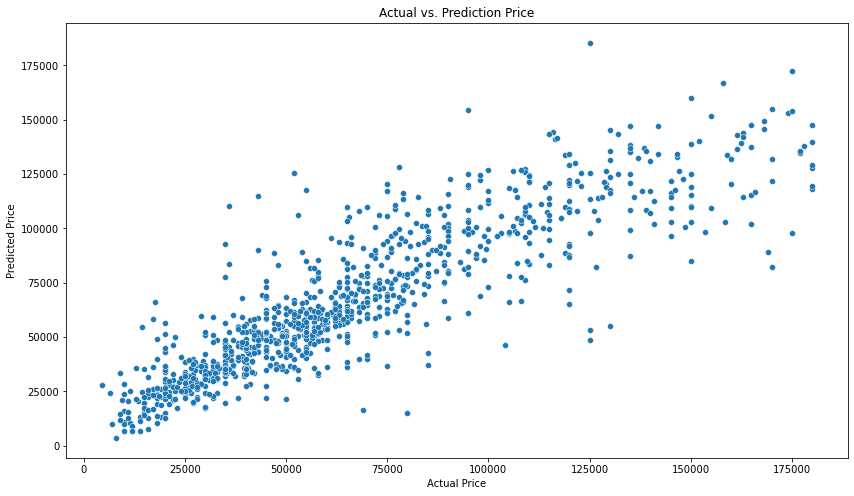

In [214]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Grafik diatas dapat menggambarkan persebaran data antara prediksi dengan data aslinya. Dengan mereferensi sebuah garis y=x, data yang berada dibawah garis y=x berarti menandakan data prediksi lebih rendah dari data aslinya (underestimation) dan data yang berada diatas garis y=x menandakan data prediksi lebih besar dari data aslinya (overestimation). Dengan nilai MAPE yang diperoleh sebesar 23.32%, model ini dapat dikategorikan ke dalam kategori 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

### Feature Importance

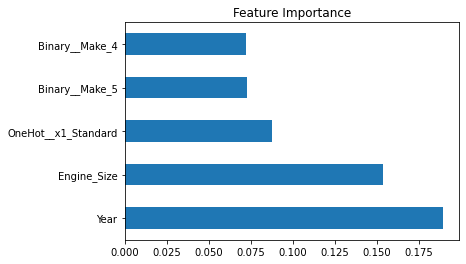

In [217]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importance')
plt.show()

Dari tampilan diatas dapat diketahui bahwa yang memiliki pengaruh paling besar terhadap harga jual mobil bekas yaitu tahun manufaktur mobil.

# Conclusion

Telah dilakukan pemodelan machine learning untuk memprediksi harga mobil bekas terhadap dataset Used Cars in Saudi dengan 3 fitur dari dataset yang paling berpengaruh terhadap hasil prediksi harga yaitu tahun manufaktur mobil (Year), Ukuran mesin (Engine_Size), dan pilihan pembelian mobil (Options).<br><br>
Jenis machine learning dengan performa paling bagus pada proyek ini yaitu menggunakan Extreme Gradient Boosting (XGB) dengan perhitungan evaluation metrics nya yaitu RMSE sebesar 18519.64, MAE sebesar 12575.55, dan MAPE sebesar 23.32%. Nilai MAPE menunjukan jika model ini digunakan untuk memprediksi sebuah dataset baru terkait mobil bekas di saudi, nilai yang diprediksi dapat lebih besar ataupun lebih kecil sebesar 23.32% dari nilai yang seharusnya.<br><br>
Kemungkinan terjadinya hasil prediksi yang jauh lebih besar dari 23.32% masih dapat terjadi. Hal tersebut dapat dilihat dari grafik perbandingan data hasil prediksi dengan data asli nya yang memang masih ada beberapa data hasil prediksinya jauh dari data aslinya. Hal tersebut dapat diakibatkan oleh keterbatasan fitur-fitur pada dataset itu sendiri yang belum dapat merepresentasikan kondisi atau ciri-ciri dari mobil bekas yang di jual di saudi secara sepenuhnya.


# Reccomendation
- Membuat kebijakan atau aturan baru dalam pengumpulan data terkait mobil bekas yang dapat dinegosiasikan perlu juga di input harganya, tidak bernilai 0 saja agar model yang dibangun dapat perform lebih baik.
- Perlu juga untuk meningkatkan pemahaman (domain knowledge) yang lebih mendalam mengenai kondisi pasar penjualan mobil bekas di saudi yang terkini.
- Menambahkan fitur-fitur yang lebih teknis terkait mobil bekas yang dijual seperti kondisi kesehatan mesin, kondisi kesehatan aki mobil, dan kondisi kesehatan pendingin udara. fitur-fitur tersebut dapat berupa suatu rentang penilaian (bintang 1 hingga 5) atau bisa juga berupa persentase.
- Melakukan pengumpulan data dengan jumlah yang lebih banyak karena pada dataset ini masih belum terlalu banyak. Dengan bertambahnya jumlah data, dapat dicoba menggunakan jenis model yang lebih kompleks seperti Recursive Neural Network (RNN)

In [ ]:
# Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_Airbnb_XGB.sav', 'wb'))

In [ ]:
# Load model
# filename = 'Model_Airbnb_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))